In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
airpas = pd.read_csv('C:/Users/Admin/Downloads/AirPassengers.csv')

In [3]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
airpas.shape  # Passengers is in 1000's

(144, 2)

In [5]:
airpas.tail()  # aim is to forecast the passenger volume for next 6 months to 1 year

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format = True)

In [7]:
ind_airpas = airpas.set_index(['Month']) # month gets converted to index.

In [8]:
ind_airpas.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [9]:
ind_airpas.shape

(144, 1)

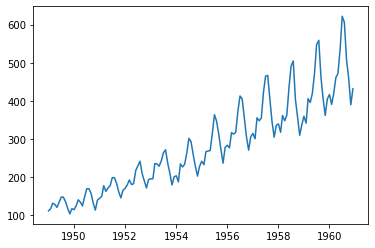

In [10]:
plt.plot(ind_airpas);  # here mean & variance both are increasing

In [11]:
ind_airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [12]:
ind_airpas.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


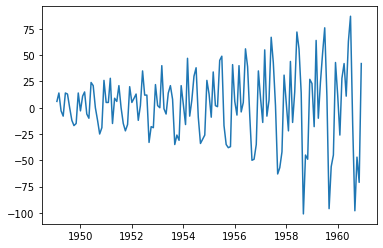

In [13]:
plt.plot(ind_airpas.diff()); # here mean is constant but variance is increasing

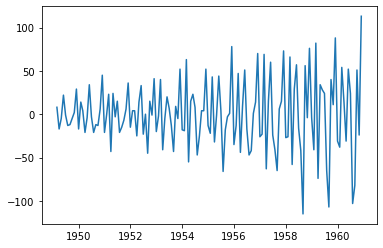

In [14]:
plt.plot(ind_airpas.diff().diff());  # 2nd

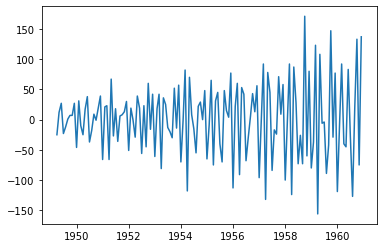

In [15]:
plt.plot(ind_airpas.diff().diff().diff()); # 3rd

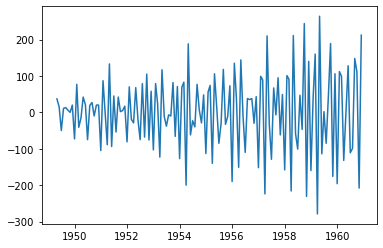

In [16]:
plt.plot(ind_airpas.diff().diff().diff().diff());   # 4th

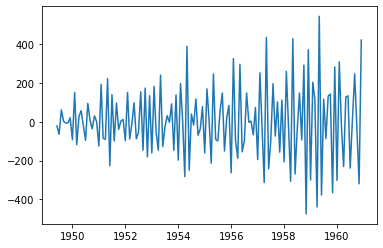

In [17]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff());  # 5th

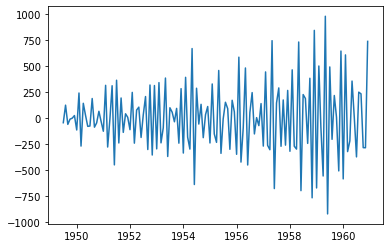

In [18]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff());  # 6th

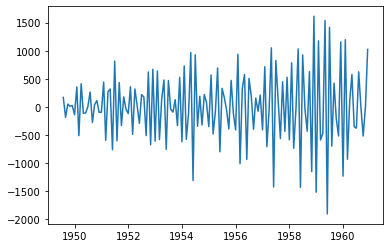

In [19]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff());  # 7th

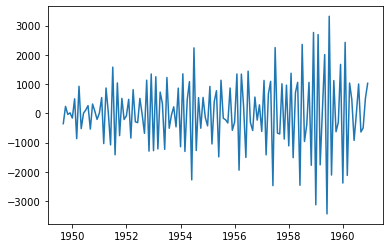

In [20]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff());  # 8th

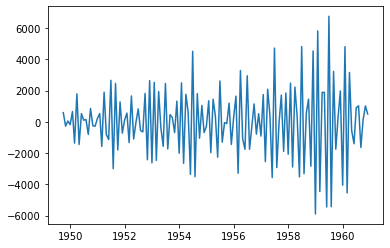

In [21]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff());  # 9th

Even after doing differencing 9 times series was not stationary

In [22]:
# to make stationary take log

ind_airpas_log = np.log(ind_airpas)

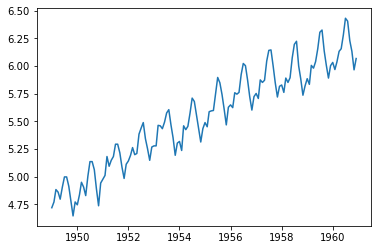

In [23]:
plt.plot(ind_airpas_log)  # mean and variance both are increasing

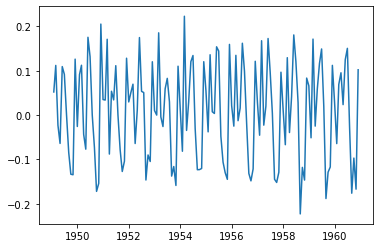

In [24]:
plt.plot(ind_airpas_log.diff())  # 1st

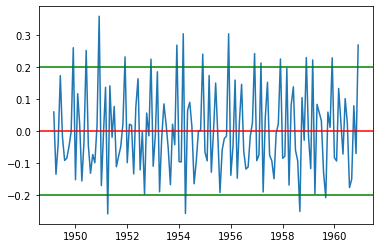

In [25]:
plt.plot(ind_airpas_log.diff().diff())   # 2nd as mean & variance are same it is almost stationary
plt.axhline(y = 0 , color = "r")
plt.axhline(y = .2 , color = "g") 
plt.axhline(y = -.2 ,color = "g")

In [26]:
# NOTE I(1) ONE LEVEL DIFF
# but my original series has changed. now my base series is lag
# model would be build on log do prediction also in lag so at the end take the anti log

In [27]:
# but whether values you get from ACF & PACF are not binding

In [28]:
from statsmodels.tsa.stattools import acf , pacf
from statsmodels.tsa.arima_model import ARIMA

In [29]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

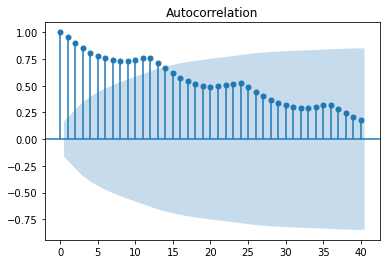

In [30]:
plot_acf(ind_airpas_log.Passengers , lags = 40);

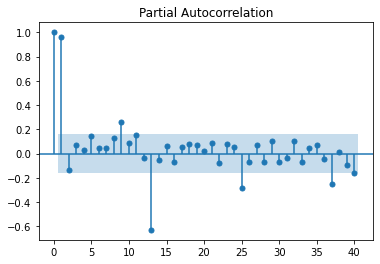

In [31]:
plot_pacf(ind_airpas_log.Passengers , lags = 40);

In [32]:
model = ARIMA(ind_airpas_log , order = (7,1,2))
result = model.fit();

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [33]:
result.params  #  params is parameters 

const                 0.009958
ar.L1.D.Passengers    1.097360
ar.L2.D.Passengers   -0.717988
ar.L3.D.Passengers    0.084098
ar.L4.D.Passengers   -0.374636
ar.L5.D.Passengers    0.202087
ar.L6.D.Passengers   -0.015185
ar.L7.D.Passengers   -0.439311
ma.L1.D.Passengers   -1.636490
ma.L2.D.Passengers    0.939968
dtype: float64

In [34]:
fore_values = result.forecast(steps=12)  # it will do the forecast for next 12 time periods in this case next 12 months

In [35]:
fore_values  # 2nd array is error & 3rd array is confidence interval

(array([6.12030257, 6.09453104, 6.10635747, 6.16063934, 6.26755768,
        6.45055353, 6.53539241, 6.4773356 , 6.36174534, 6.24233664,
        6.18072583, 6.18986185]),
 array([0.06019897, 0.06628454, 0.06651167, 0.06717805, 0.0673262 ,
        0.06985472, 0.07997035, 0.08212752, 0.08212835, 0.08212842,
        0.08224731, 0.08509988]),
 array([[6.00231475, 6.23829038],
        [5.96461574, 6.22444635],
        [5.97599699, 6.23671794],
        [6.02897278, 6.29230589],
        [6.13560075, 6.39951461],
        [6.3136408 , 6.58746627],
        [6.37865342, 6.69213141],
        [6.31636861, 6.63830259],
        [6.20077674, 6.52271394],
        [6.08136789, 6.40330539],
        [6.01952405, 6.3419276 ],
        [6.02306915, 6.35665455]]))

In [36]:
fore_values[0]

array([6.12030257, 6.09453104, 6.10635747, 6.16063934, 6.26755768,
       6.45055353, 6.53539241, 6.4773356 , 6.36174534, 6.24233664,
       6.18072583, 6.18986185])

In [37]:
np.round(np.exp(fore_values[0]))   #   taking antilog (prediction in original scale)

array([455., 443., 449., 474., 527., 633., 689., 650., 579., 514., 483.,
       488.])

In [38]:
# Can I find the error :  NO (bcz forecast is for the future values and we do not have the actual values for )

In [39]:
# we can not do random sampling but we can do sequential sampling
# build the model till 1959 and do forecast on 1960

In [40]:
forecast_values = result.forecast(steps = 12)

In [41]:
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df = np.exp(forecast_values_df)

In [42]:
forecast_values_df.rename(columns= {forecast_values_df.columns[0] : 'Predicted'} , inplace = True)

In [43]:
forecast_values_df

,Predicted
0,455.002342
1,443.426049
2,448.701326
3,473.730851
4,527.188241
5,633.052611
6,689.104145
7,650.236147
8,579.256475
9,514.058276


In [44]:
date_for_pred = ['1961-01-01' , '1961-02-01' ,
'1961-03-01', '1961-04-01','1961-05-01',
'1961-06-01', '1961-07-01','1961-08-01',
'1961-09-01', '1961-10-01','1961-11-01',
'1961-12-01']

In [45]:
forecast_values_df = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)

In [46]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True)

In [47]:
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )

In [48]:
forecast_values_df.head()

,Predicted,Month
0,455.002342,1961-01-01
1,443.426049,1961-02-01
2,448.701326,1961-03-01
3,473.730851,1961-04-01
4,527.188241,1961-05-01


In [49]:
pred_airpas = forecast_values_df.set_index(['Month'])

In [50]:
pred_airpas.head()

,Predicted
Month,
1961-01-01,455.002342
1961-02-01,443.426049
1961-03-01,448.701326
1961-04-01,473.730851
1961-05-01,527.188241


<AxesSubplot:xlabel='Month'>

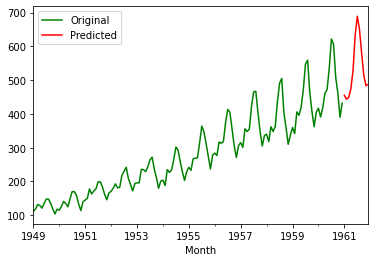

In [51]:
ind_airpas['Passengers'].plot(legend = True , label = "Original" , color ="green") # original
pred_airpas['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted

### Train & Test

In [52]:
airpas = pd.read_csv('C:/Users/Admin/Downloads/AirPassengers.csv')
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format= True )
ind_airpas = airpas.set_index(['Month'])

In [53]:
train = ind_airpas.iloc[0:132]   # 1st 11 years
test = ind_airpas.iloc[132:144]  # last 1 year 

<AxesSubplot:xlabel='Month'>

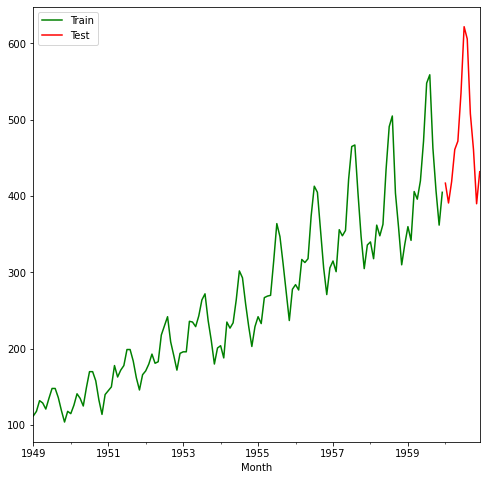

In [54]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")

In [55]:
train_log = np.log(train)

In [56]:
model = ARIMA(ind_airpas_log , order = (10,2,2))  # P, d, q (10,2,2)
result = model.fit()

forecast_values = result.forecast(steps=24)
forecast_values

forecast_values[0]
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df

forecast_values_df = np.exp(forecast_values_df)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
date_for_pred = ['1960-01-01' , '1960-02-01' ,
'1960-03-01', '1960-04-01','1960-05-01',
'1960-06-01', '1960-07-01','1960-08-01',
'1960-09-01', '1960-10-01','1960-11-01',
'1960-12-01','1961-01-01' , '1961-02-01' ,
'1961-03-01', '1961-04-01','1961-05-01',
'1961-06-01', '1961-07-01','1961-08-01',
'1961-09-01', '1961-10-01','1961-11-01',
'1961-12-01']

In [58]:
forecast_values_df = pd.concat([ pd.Series(date_for_pred ) , forecast_values_df], axis=1)
l1 = [ 'Month' , 'Passengers']
forecast_values_df.columns = l1

In [59]:
forecast_values_df.head()

,Month,Passengers
0,1960-01-01,462.803237
1,1960-02-01,430.908358
2,1960-03-01,458.845780
3,1960-04-01,478.275500
4,1960-05-01,519.016189


In [60]:
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )

In [61]:
forecast_values_df = forecast_values_df.set_index(['Month'])

<AxesSubplot:xlabel='Month'>

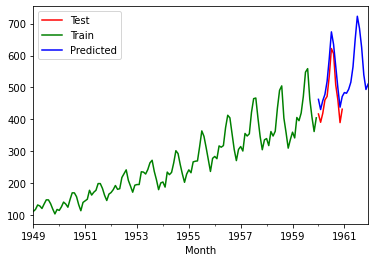

In [62]:
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
forecast_values_df['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")

# we can see that predicted values are not in line (do not follow the pattern of actual)

In [63]:
error = test['Passengers'] - forecast_values_df['Passengers']

In [64]:
MSE210 = np.mean(np.square(error))
MSE210

1928.7770056133188

## SARIMA WITH AUTO ARIMA
where S stands for seasonality

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima 
from pmdarima import auto_arima

In [70]:
! pip install pmdarima

In [72]:
airpas = pd.read_csv('C:/Users/Admin/Downloads/AirPassengers.csv')

In [73]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format = True)

In [74]:
ind_airpas = airpas.set_index(['Month']) # month gets converted to index..

In [75]:
ind_airpas_log = np.log(ind_airpas)

In [76]:
result = seasonal_decompose(ind_airpas_log)

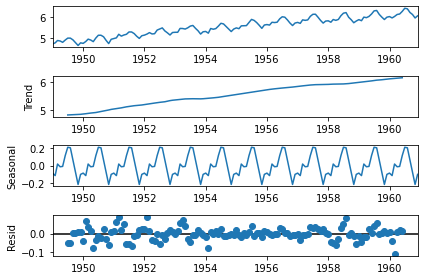

In [77]:
result.plot();  # g

In [78]:
# Auto ARIMA and then SARIMA

In [80]:
auto_arima(ind_airpas_log , seasonal=True , m=12, maxiter=100)
# it can give slightly different results
# it will try to find the best combination of p,d,q and s

ARIMA(maxiter=100, order=(2, 0, 0), scoring_args={},
      seasonal_order=(0, 1, 1, 12), suppress_warnings=True)

In [85]:
model_sarima = SARIMAX(ind_airpas_log , ordeer=(2,0,0), seasonal_order=(0,1,1,12))
results = model_sarima.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [90]:
np.exp(results.predict(start=132, end=143))   # Last 1 yesr (1960)

1960-01-01    420.173962
1960-02-01    396.140136
1960-03-01    455.962009
1960-04-01    407.446470
1960-05-01    477.909693
1960-06-01    544.399296
1960-07-01    606.124447
1960-08-01    627.532199
1960-09-01    506.628377
1960-10-01    444.695638
1960-11-01    404.263253
1960-12-01    433.092221
Freq: MS, Name: predicted_mean, dtype: float64

In [91]:
pred = np.exp(results.predict(start=132, end=143)) 

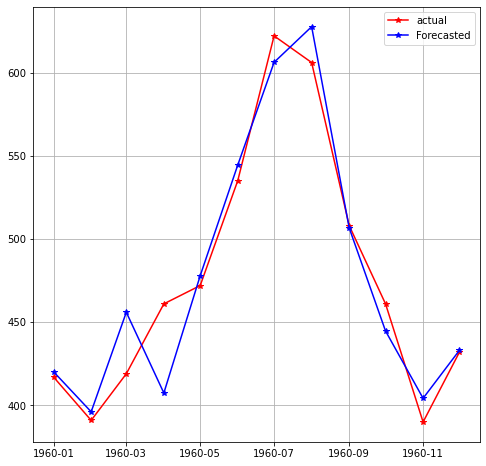

In [93]:
plt.figure(figsize=(8,8))
plt.plot(ind_airpas[132:144], marker="*", color="r", label = "actual")
plt.plot(pred, color="b", label="Forecasted", marker="*")
plt.legend()
plt.grid()

In [94]:
error = ind_airpas.Passengers[132:144] - pred

In [95]:
MSE = np.mean(np.square(error))
MSE

465.1627169909809

In [98]:
RMSE = np.sqrt(MSE)
RMSE

21.56763123272885

In [ ]:
# above we have done the prediction till 1960

In [99]:
pred_fut = np.exp(results.predict(start=144, end=155))   # prediction for 1961 i.e.. for future values

In [100]:
pred_fut

1961-01-01    446.521791
1961-02-01    421.653015
1961-03-01    474.720031
1961-04-01    484.841023
1961-05-01    499.838483
1961-06-01    572.113196
1961-07-01    654.600996
1961-08-01    650.775517
1961-09-01    544.280936
1961-10-01    483.165789
1961-11-01    417.357607
1961-12-01    462.689216
Freq: MS, Name: predicted_mean, dtype: float64

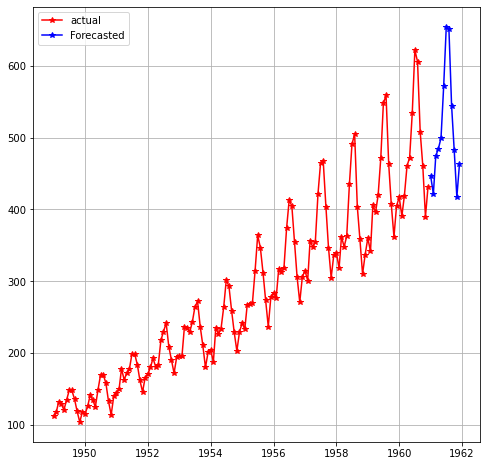

In [104]:
plt.figure(figsize=(8,8))
plt.plot(ind_airpas, marker="*", color="r", label = "actual")
plt.plot(pred_fut, color="b", label="Forecasted", marker="*")
plt.legend()
plt.grid()